In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define paths and constants
MAIN_PATH = "F:\Shubham\Acadamic\PetImages"
NUM_CLASSES = 2
HEIGHT, WIDTH = 128, 128
BATCH_SIZE = 32
SPLIT = 0.2
EPOCHS = 10

# Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=SPLIT
)

train_generator = train_datagen.flow_from_directory(
    MAIN_PATH,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    MAIN_PATH,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    subset="validation"
)

# Define the model with Transfer Learning
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers (excluding the final block)
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator)


Found 19968 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.
9406464/9406464 [==============================] - 6s 1us/step
Epoch 1/10
262/624 [===========>..................] - ETA: 1:56 - loss: 0.2269 - accuracy: 0.9045

C:\Coding\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 [==============================] - 249s 392ms/step - loss: 0.1980 - accuracy: 0.9169 - val_loss: 0.1685 - val_accuracy: 0.9281
Epoch 2/10
624/624 [==============================] - 232s 373ms/step - loss: 0.1502 - accuracy: 0.9388 - val_loss: 0.1520 - val_accuracy: 0.9359
Epoch 3/10
624/624 [==============================] - 228s 365ms/step - loss: 0.1425 - accuracy: 0.9403 - val_loss: 0.1301 - val_accuracy: 0.9459
Epoch 4/10
624/624 [==============================] - 243s 389ms/step - loss: 0.1370 - accuracy: 0.9441 - val_loss: 0.1412 - val_accuracy: 0.9417
Epoch 5/10
624/624 [==============================] - 242s 388ms/step - loss: 0.1237 - accuracy: 0.9490 - val_loss: 0.1347 - val_accuracy: 0.9449
Epoch 6/10
624/624 [==============================] - 235s 376ms/step - loss: 0.1225 - accuracy: 0.9498 - val_loss: 0.1425 - val_accuracy: 0.9391
Epoch 7/10
624/624 [==============================] - 233s 373ms/step - loss: 0.1137 - accuracy: 0.9538 - val_loss: 0.1445 - val_accura

156/156 [==============================] - 49s 313ms/step - loss: 0.1297 - accuracy: 0.9449
Test loss: 0.13, Test accuracy: 94.49%


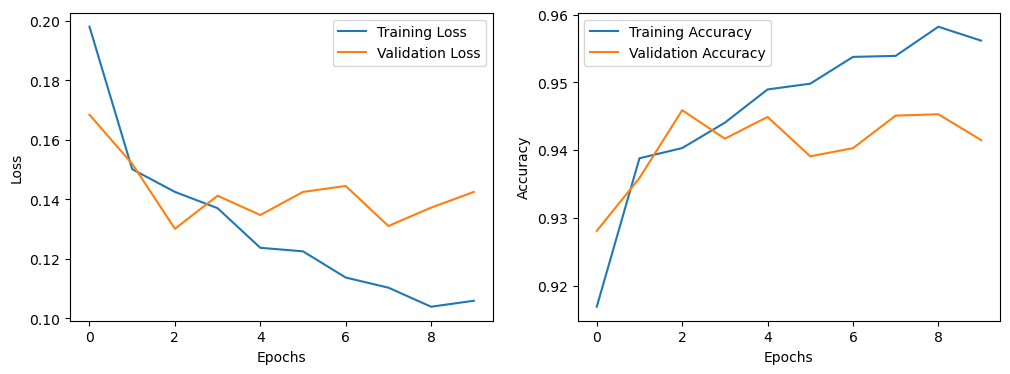

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(val_generator)
print(f"Test loss: {test_loss:.2f}, Test accuracy: {test_accuracy*100:.2f}%")

# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



1/1 [==============================] - 0s 45ms/step


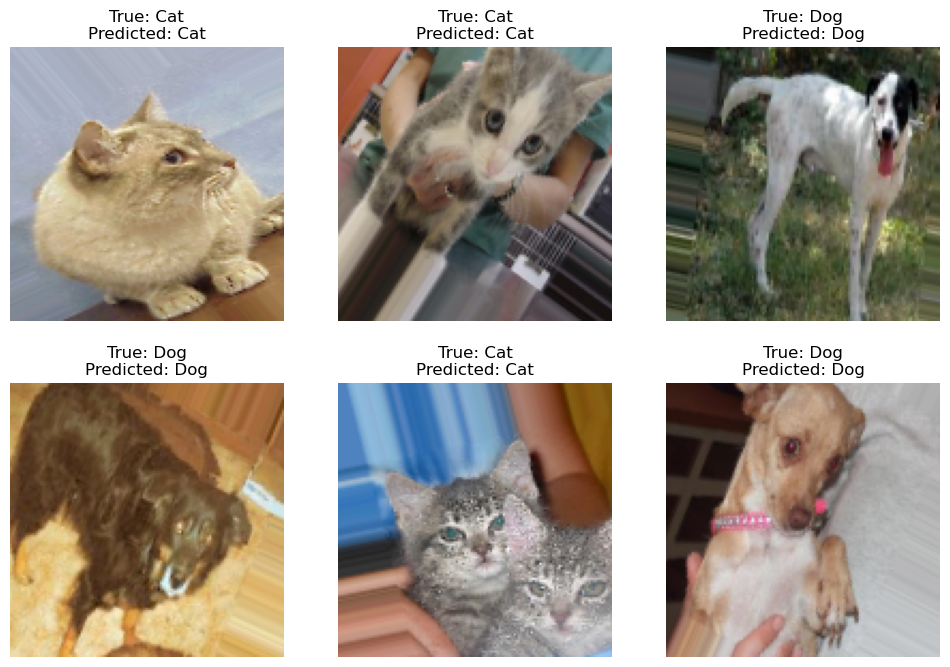

1/1 [==============================] - 0s 63ms/step


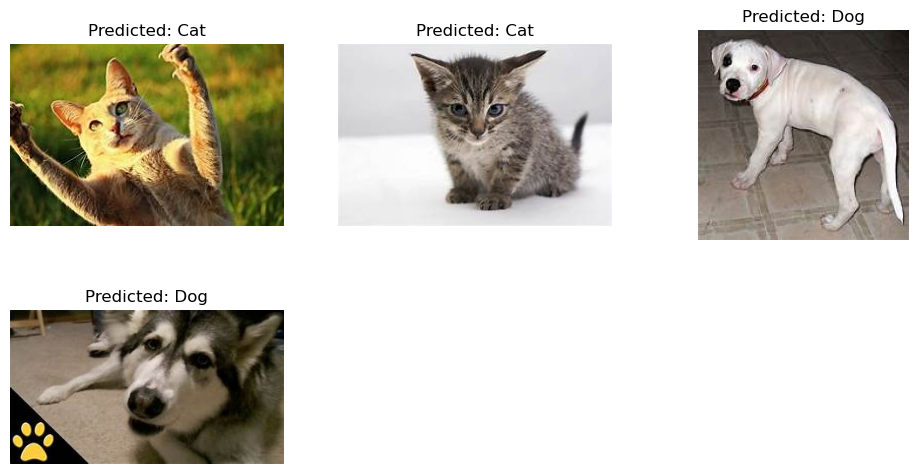

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Define class names
class_names = list(train_generator.class_indices.keys())

# Function to plot and predict for sample images
def plot_and_predict_sample_images(model, generator, num_images=6):
    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        plt.subplot(2, 3, i + 1)
        image, label = next(generator)
        image = image[0]  # Get the first image from the batch
        label = class_names[np.argmax(label)]
        prediction = model.predict(np.expand_dims(image, axis=0))
        predicted_label = class_names[np.argmax(prediction)]
        plt.imshow(image)
        plt.title(f'True: {label}\nPredicted: {predicted_label}')
        plt.axis('off')
    plt.show()

# Plot and predict for sample images
plot_and_predict_sample_images(model, val_generator, num_images=6)

# Function to predict labels for new images
def predict_labels_for_new_images(model, image_paths):
    predicted_labels = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ensure correct color format
        img = cv2.resize(img, (HEIGHT, WIDTH))
        img = img / 255.0  # Normalize
        prediction = model.predict(np.expand_dims(img, axis=0))
        predicted_label = class_names[np.argmax(prediction)]
        predicted_labels.append(predicted_label)
    return predicted_labels

# Function to plot images and their predictions
def plot_images_with_predictions(image_paths, predicted_labels):
    plt.figure(figsize=(12, 6))
    for i, path in enumerate(image_paths):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ensure correct color format
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(f'Predicted: {predicted_labels[i]}')
        plt.axis('off')
    plt.show()

# Example: Provide paths to new images
new_image_paths = ["F:\Shubham\Acadamic\c1.jpg", "F:\Shubham\Acadamic\c2.jpg", "F:\Shubham\Acadamic\d1.jpg","F:\Shubham\Acadamic\d2.jpg"]predicted_labels = predict_labels_for_new_images(model, new_image_paths)

# Plot images and their predictions
plot_images_with_predictions(new_image_paths, predicted_labels)


